In [65]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import shutil
import pandas as pd
import cv2
from IPython.display import clear_output
import os
from sklearn import preprocessing
import matplotlib.patches as patches
import time
from termcolor import colored

# Create Dataset

In [66]:
Haak1_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_true_annot.csv')
Haak1_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_object_annot.csv')
Haak1_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_land_annot.csv')

Haak3_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_true_annot.csv')
Haak3_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_object_annot.csv')
Haak3_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_land_annot.csv')

Danilo_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_true_annot.csv')
Danilo_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_ano_land_annot.csv')
Empty_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Empty.csv')

In [67]:
# Haak - Flight 1
Haak1_true_train       = Haak1_true_df.sample(frac = 0.7, random_state = 100)
Haak1_true_test        = Haak1_true_df.drop(Haak1_true_train.index)

Haak1_ano_object_train = Haak1_anomalies_object_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_object_test  = Haak1_anomalies_object_df.drop(Haak1_ano_object_train.index)
Haak1_ano_object       = Haak1_anomalies_object_df

Haak1_ano_land_train   = Haak1_anomalies_land_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_land_test    = Haak1_anomalies_land_df.drop(Haak1_ano_land_train.index)
Haak1_ano_land         = Haak1_anomalies_land_df
 
# Haak - Flight 1
Haak3_true             = Haak3_true_df
Haak3_ano_object       = Haak3_anomalies_object_df
Haak3_ano_land         = Haak3_anomalies_land_df

# Danilo
Danilo_true            = Danilo_true_df
Danilo_ano_land        = Danilo_anomalies_land_df
empty                  = Empty_df


'''
Haak1_true_train | Haak1_true_test
Haak1_ano_object
Haak1_ano_land

Haak3_true 
Haak3_ano_object 
Haak3_ano_land 

Danilo_true
empty
Danilo_ano_land
'''

'\nHaak1_true_train | Haak1_true_test\nHaak1_ano_object\nHaak1_ano_land\n\nHaak3_true \nHaak3_ano_object \nHaak3_ano_land \n\nDanilo_true\nempty\nDanilo_ano_land\n'

# Custom Eval - ACTUALLY IN USE

In [ ]:
df = Haak1_true_train
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True

##################################################### HAAK 1
#####################################################
df = Haak1_true_test
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak1_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak1_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### HAAK 3
#####################################################
df = Haak3_true
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak3_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak3_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### DANILO
#####################################################
df = Danilo_true
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Danilo_ano_land
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

In [64]:
df = Haak3_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False
#####################################################
area_threshold = 20
threshold_mask = 6.4
#threshold_mask = 10
gaussian_mask = 5

doPlots = False
doExhaustivePlots = False
doErrorValidation = True
doNMSValidation = False
#####################################################
n_files = len(df)
start = 0
end = n_files
#end = 5

metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
j = 0
#####################################################
for i, row in df[start:end].iterrows():
    j += 1
    ############################
    true_boxes = []
    pred_boxes = []
    intersection_boxes = []
    FP, FN, TP = 0,0,0
    ############################
    
    print(str(j) + '/' + str(n_files), end='\r')
    file = row['file']
    
    img = np.array(Image.open(os.path.join(directory, file)))

    ##################### ALGORITHM #####################
    # CANNY
    img_canny = cv2.Canny(img, 6.4, 3*6.4)

    # DILATE
    kernel = np.ones((5,5), np.uint8)
    img_dil = cv2.dilate(img_canny, kernel, iterations = 1)
    
    # ERODE
    kernel = np.ones((5,5), np.uint8)
    img_ero = cv2.erode(img_dil, kernel, iterations = 1)
    
    mask = img_ero
    
    #####################
    if isAnomLand or isAnomObject:
        true_boxes = [row[['x','y','w','h']].to_numpy()]

    # Pred Boxes
    pred_boxes = boxes_from_mask(mask, area_threshold)
    
    if (not isAnomLand) and (len(pred_boxes) >= 2):
        if doNMSValidation: 
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('NON MAXIMAL SUPRESSION', 'magenta'))
            print('Prior: {}'.format(pred_boxes))
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
            print('Post: {}'.format(pred_boxes))
            _ = input()    
        else:
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
    
    pre_land_boxes = []
    if isAnomLand:
        pre_land_boxes = pred_boxes
        pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

    # Calculate accuracy
    intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)


    # Metrics
    update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
    metrics = {i: metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

    # Plot
    title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

    if doPlots:
        plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
        
    if doExhaustivePlots:
        exhaustive_plot_results(img, img_canny, img_dil, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title)

    if doErrorValidation:
        if FP:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE POSITIVE, total: {}'.format(metrics['FPs']), 'cyan'))
            print(row)
            print(pred_boxes)
            _ = input()
        if FN:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE NEGATIVE, total: {}'.format(metrics['FNs']), 'red'))
            print(row)
            _ = input()
        
    
print('\n\n######## frames: {} mask threshold: {} | gaussian threshold: {} ########'.format(n_files, threshold_mask, gaussian_mask)) 
print('Object: {}'.format(metrics))
print('Recall: {:.4f}'.format(metrics['TPs']/(metrics['FNs']+metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(metrics['TPs']/(metrics['FPs']+metrics['TPs']+0.00000001)))



#        Flight 1    Flight 2      Flight 3
#   Rec
#   Prec

<ipython-input-45-eda3819331b2>:117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours_areathrsh = np.array(contours_areathrsh)


1438/1438

######## frames: 1438 mask threshold: 6.4 | gaussian threshold: 5 ########
Object: {'TPs': 1438.0, 'FNs': 0.0, 'FPs': 0.0}
Recall: 1.0000
Precision: 1.0000


# Custom Eval 2

In [ ]:
##################################################### HAAK 1
directory = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1'
object_df = Haak1_ano_object
land_df   = Haak1_ano_land
true_df   = Haak1_true_test
resizeInput  = False
fps = 7
Haak1 = True

##################################################### HAAK 3
directory = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3'
object_df = Haak3_ano_object
land_df   = Haak3_ano_land
true_df       = Haak3_true
resizeInput  = False
fps = 7
Haak1 = False

##################################################### DANILO
directory = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo'
object_df = empty
land_df   = Danilo_ano_land
true_df       = Danilo_true
resizeInput  = True
fps = 1
Haak1 = False

In [124]:
##################################################### DANILO
directory = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo'
object_df = empty
land_df   = Danilo_ano_land
true_df       = Danilo_true
resizeInput  = True
fps = 1
Haak1 = False

#####################################################
area_threshold = 20
threshold_mask = 6.4
gaussian_mask = 5

savePlot = False
isAdaptive = False

UpdateWithoutLand = False
doPlots = True
doExhaustivePlots = False # DOESNT DIFFER FROM NORMAL PLOT
doErrorValidation = False
doNMSValidation = False
#####################################################
files = sorted(os.listdir(directory))
n_files = len(files)
start = 0
end = n_files
#end = 50


object_metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
land_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
true_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
j = start
#####################################################
for i, file in enumerate(files[start:end]):
    #time.sleep(0.5)
    j += 1
    ############################
    true_boxes = []
    pred_boxes = []
    intersection_boxes = []
    FP, FN, TP = 0,0,0
    ############################
    #output.clear()
    print(str(j) + '/' + str(n_files))

    isAnomObject = object_df['file'].str.contains(file).sum()
    isAnomLand   = land_df['file'].str.contains(file).sum()
    isTrue       = true_df['file'].str.contains(file).sum()
    
    isTrueTrain = True if (Haak1_true_train['file'].str.contains(file).sum() and Haak1) else False
    
    if (not isAdaptive) and isTrueTrain:
      #print('Skipping')
      continue

    
    img = np.array(Image.open(os.path.join(directory, file)))
    #img = cv2.imread(os.path.join(directory, file))

    if resizeInput:
      img = resizeInputFunc(img)

    # DONT WANT ADAPTIVE TO APlpY TO EDGE CASES FRAMES
    if not (isAnomObject or isAnomLand or isTrue or isTrueTrain):
      #print('Skipping')
      continue


    ##################### ALGORITHM #####################
    # CANNY
    img_canny = cv2.Canny(img, 6.4*16, 19*6.4)

    # DILATE
    kernel = np.ones((5,5), np.uint8)
    img_dil = cv2.dilate(img_canny, kernel, iterations = 1)
    
    # ERODE
    kernel = np.ones((5,5), np.uint8)
    img_ero = cv2.erode(img_dil, kernel, iterations = 1)
    
    mask = img_ero
    
    #####################

    if isAnomObject:
        scenery = 'Object'
        true_boxes = object_df[object_df['file'] == file]
        true_boxes = true_boxes[['x','y','w','h']].to_numpy()      
    elif isAnomLand:
        scenery = 'Land'
        true_boxes = land_df[land_df['file'] == file]
        true_boxes = true_boxes[['x','y','w','h']].to_numpy()    
    elif isTrue:
        scenery = 'Nothing'
    else:
        print('file {} is not assessed (edge case)?'.format(file))
        continue

    # Pred Boxes
    pred_boxes = boxes_from_mask(mask, area_threshold)
    
    if (not isAnomLand) and (len(pred_boxes) >= 2):
        if doNMSValidation: 
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, 'N/A')
            print(colored('NON MAXIMAL SUPRESSION', 'magenta'))
            print('Prior: {}'.format(pred_boxes))
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
            print('Post: {}'.format(pred_boxes))
            _ = input()
        else:
            print('sv')
            #pred_boxes = pred_box_IoU_cancellation(pred_boxes)
    
    pre_land_boxes = []
    if isAnomLand:
        pre_land_boxes = pred_boxes
        pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

    # Calculate accuracy
    intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)


    # Metrics
    if isAnomObject:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        object_metrics = {i: object_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
    elif isAnomLand:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        land_metrics = {i: land_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
    elif isTrue:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        true_metrics = {i: true_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

    # Plot
    title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

    if doPlots:
        plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
        
    if doExhaustivePlots:
        exhaustive_plot_results(img, img_gauss, img_prewitt, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title)

    if doErrorValidation:
        if FP:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE POSITIVE, total: {}'.format(object_metrics['FPs']+land_metrics['FPs']+true_metrics['FPs']), 'cyan'))
            print(row)
            print(pred_boxes)
            _ = input()
        if FN:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE NEGATIVE, total: {}'.format(object_metrics['FNs']+land_metrics['FNs']+true_metrics['FNs']), 'red'))
            print(row)
            _ = input()
            
    if savePlot:
        
        im_mask = Image.fromarray(mask)
        method = 'EdgeDetection2_ideal_F3'
        flight = 'Danilo'
        im_mask.save(os.path.join('/Volumes/Samsung_T5/Methods/', str(method), str(flight), '{0:05d}'.format(i) + '.png'))
    
    #if resizeInput:   
    #    im_true = resizeInputFunc(img)
    #im_true = Image.fromarray(img)
    #flight = 'Danilo'
    #im_true.save(os.path.join('/Volumes/Samsung_T5/Methods/', str(flight), '{0:05d}'.format(i) + '.png'))
        



#        Flight 1    Flight 2      Flight 3
#   Rec
#   Prec

print('Len true: {}, len obj: {}, len land: {}'.format(len(true_df), len(object_df), len(land_df)))
print('Object: {}'.format(object_metrics))
print('Recall: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FNs']+object_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FPs']+object_metrics['TPs']+0.00000001)))
print('--------')
print('Land: {}'.format(land_metrics))
print('Recall: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FNs']+land_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FPs']+land_metrics['TPs']+0.00000001)))
print('--------')
print('True: {}'.format(true_metrics))
print('Recall: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FNs']+true_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FPs']+true_metrics['TPs']+0.00000001)))

KeyboardInterrupt: 

In [ ]:
# PLACEHOLDER

In [68]:
def resizeInputFunc(img):

    img_resized = cv2.resize(img, (640,512), interpolation = cv2.INTER_CUBIC)

    return img_resized


def pred_box_IoU_cancellation(pred_boxes):
    
    boxes_to_save = np.ones(len(pred_boxes))
    for i, box1 in enumerate(pred_boxes):       
        for j, box2 in enumerate(pred_boxes):
            if i == j:
                continue

            _, _, _, _, A_intsc, A_union, IoU, A1, A2  = intersection_info(box1, box2)
            
            # if two predicted boxes are almost equal (50% of area in another, remove the smallest)
            if (A_intsc > 0.25*A1) or (A_intsc > 0.25*A2):
                if A1 >= A2:
                    boxes_to_save[j] = 0
                else:
                    boxes_to_save[i] = 0
                  
    boxes = []
    for k, boolean in enumerate(boxes_to_save):
        if boolean:
            box = pred_boxes[k]
            boxes = [*boxes, box]
    boxes = np.array(boxes)
    
    return boxes


def covering_rectangle_from_square_boxes(boxes):
    output = np.array([])
    
    if len(boxes):
        x_left = np.min(boxes[:,0])
        width = np.max(boxes[:,0] + boxes[:,2] - x_left)
        y_top = np.min(boxes[:,1])
        height = np.max(boxes[:,1] + boxes[:,3] - y_top)
        
        output = np.array([[x_left, y_top, width, height]])

    return output

def intersection_info(box_i, box_j):
    # NMS
    x_left_i, y_upper_i, w_i, h_i = box_i
    x_right_i = x_left_i + w_i
    y_lower_i = y_upper_i + h_i
    area_i = w_i*h_i

    x_left_j, y_upper_j, w_j, h_j = box_j
    x_right_j = x_left_j + w_j
    y_lower_j = y_upper_j + h_j
    area_j = w_j*h_j

    x_left  = max(x_left_i, x_left_j)
    y_upper = max(y_upper_i, y_upper_j)

    x_right = min(x_right_i, x_right_j)
    y_lower = min(y_lower_i, y_lower_j)

    w_intersec = max(0, x_right - x_left)
    h_intersec = max(0, y_lower - y_upper)

    intersection_area = w_intersec*h_intersec
    union_area = area_i + area_j - intersection_area
    IoU = intersection_area / union_area
    
    return list([x_left, y_upper, w_intersec, h_intersec, intersection_area, union_area, IoU, area_i, area_j])

def compare_predictions_with_truth(pred_boxes, true_boxes):
    
    false_positives = 0
    false_negatives = 0
    true_positives = 0
    
    
    intersection_boxes = []
    match_found_pred = np.ones(len(pred_boxes))
    match_found_true = np.ones(len(true_boxes))
    
    for i, box_pred in enumerate(pred_boxes):
        for j, box_true in enumerate(true_boxes):
                     
            x_left, y_upper, w_intsc, h_intsc, A_intsc, A_union, IoU, A_pred, A_true  = intersection_info(box_pred, box_true)

            # If IoU big enough
            if IoU >= 0.1:
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            # If within on another, and area large enough
            elif (IoU >= 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
                
            # If within on another, but area small, only false neg, not false positve
            elif (IoU < 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
            
    intersection_boxes = np.array(intersection_boxes)
        
    false_positives = match_found_pred.sum()
    false_negatives = match_found_true.sum()
    true_positives  = len(match_found_true) - false_negatives
                
    return intersection_boxes, false_positives, false_negatives, true_positives

def boxes_from_mask(mask, area_threshold):
    
    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, 2)
    
    # Threshold by area
    contours_areathrsh = []
    for cnt in contours:
        if cv2.contourArea(cnt) > area_threshold:
            contours_areathrsh = [*contours_areathrsh, cnt]
    contours_areathrsh = np.array(contours_areathrsh)
    
    # combine boxes thresholded
    boxes = []
    for i, cnt in enumerate(contours_areathrsh):
        box = cv2.boundingRect(cnt)
        boxes = [*boxes, box]
    boxes = np.array(boxes)

    return boxes

def plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,10))

    # Plot boxes - Area thresholded
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=2)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=2)
        ax.add_patch(rect)           
 
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    
    plt.show()
    
    
def exhaustive_plot_results(img, img_canny, img_dil, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,28))

    # Plot boxes - Area thresholded
    plt.subplot(3,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(3,2,2)
    plt.imshow(img_canny, cmap='gray')
    plt.colorbar()
    
    plt.subplot(3,2,3)
    plt.imshow(img_dil, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(3,2,4)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    # Boxes in evaluation
    plt.subplot(3,2,5)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    
    # All boxes
    plt.subplot(3,2,6)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
    
    for i, box in enumerate(pre_land_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=4)
        ax.add_patch(rect)
    
    
        
     
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    plt.show()

# VISUALIZATION

In [96]:
img = np.array(Image.open(os.path.join('/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/', '00121.png')))


##################### ALGORITHM #####################
# CANNY
img_canny = cv2.Canny(img, 6.4, 3*6.4)

# DILATE
kernel = np.ones((5,5), np.uint8)
img_dil = cv2.dilate(img_canny, kernel, iterations = 1)

# ERODE
kernel = np.ones((5,5), np.uint8)
img_ero = cv2.erode(img_dil, kernel, iterations = 1)

mask = img_ero

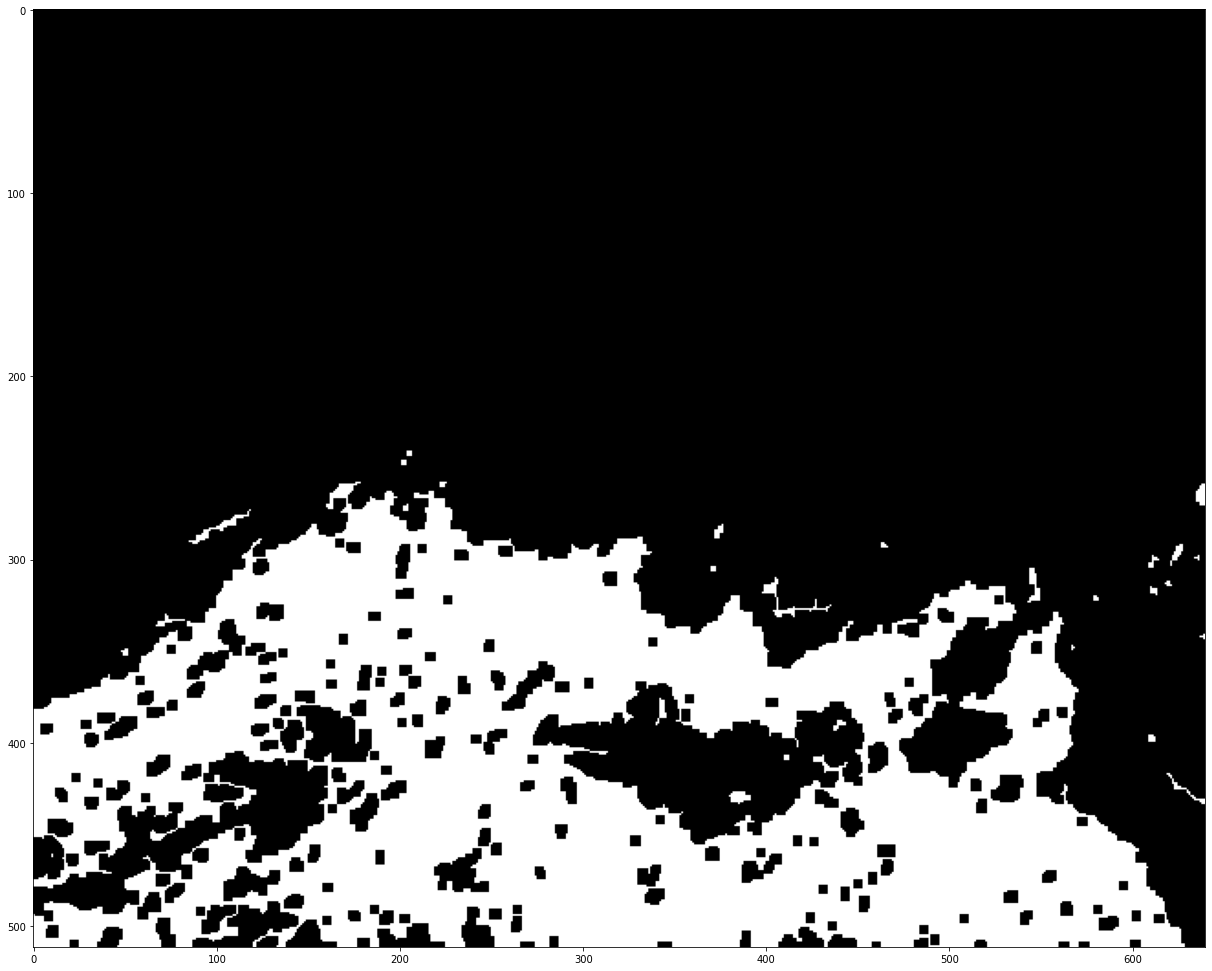

In [98]:
plt.figure(figsize=(21,21))
plt.imshow(img_ero, cmap='gray')